In [1]:
import pandas as pd,numpy as np
from sklearn.linear_model import LogisticRegression
# Import accuracy metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('Train_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

No missing values exist in the data. Let's look at the data better to understand it.

In [3]:
df.describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,341-3180,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


As we see from above, the state variable has 51 unique states encoded with 2 letter string of the state's name. Variables international plan and voice mail plan have yes/no as answers. The target variable Churn has true/false values. These variables contain labels so they need to be encoded. We'll use LabelEncoder to do that.
First, lets define the categorical columns and numerical columns of the data

In [4]:
cat_cols=['state', 'international plan', 'voice mail plan',  'area code', 'phone number','Churn']
num_cols=[ 'number vmail messages', 'account length',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls']
for i in cat_cols:
    df[i] = df[i].astype(object)
for i in num_cols:
    df[i] = df[i].astype(np.float64)

In [5]:
df.describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
count,3333,3333.000000,3333.0,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,3.0,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,415.0,341-3180,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,106,NaN,1655.0,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,NaN,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,NaN,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,NaN,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,NaN,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


##### As we see that each phone number is unique for all observations, so we can remove it as it does not add any information to the data.

In [6]:
df.drop(columns=['phone number'],axis=1,inplace=True)
cat_cols.remove('phone number')

##### Lets Encode the remaining categorical variables using Label Encoder

In [7]:

# lets define labelEncoder for each variable that needs to be encoded.
labelEnc_state=LabelEncoder()
labelEnc_area=LabelEncoder()
labelEnc_intpl=LabelEncoder()
labelEnc_vpl=LabelEncoder()
labelEnc_churn=LabelEncoder()
df.state=labelEnc_state.fit_transform(df.state)
df['area code']=labelEnc_area.fit_transform(df['area code'])
df['international plan']=labelEnc_intpl.fit_transform(df['international plan'])
df['voice mail plan']=labelEnc_vpl.fit_transform(df['voice mail plan'])
df['Churn']=labelEnc_churn.fit_transform(df['Churn'])
for i in cat_cols:
    df[i] = df[i].astype(object)

In [8]:
df.describe(include='all')

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
count,3333.0,3333.000000,3333.0,3333.0,3333.0,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.0
unique,51.0,NaN,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,49.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,106.0,NaN,1655.0,3010.0,2411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850.0
mean,NaN,101.064806,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [9]:
labelEnc_state.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [10]:
labelEnc_area.classes_

array([408, 415, 510], dtype=object)

In [11]:
labelEnc_intpl.classes_

array([' no', ' yes'], dtype=object)

In [12]:
labelEnc_vpl.classes_

array([' no', ' yes'], dtype=object)

In [13]:
labelEnc_churn.classes_

array([' False.', ' True.'], dtype=object)

Now after successfully encoding the categorical data, let's step into visualizing the data

## Exploratory Data Analysis
### Numerical Variables
Let's construct histograms to understand the distribution of the numerical variables

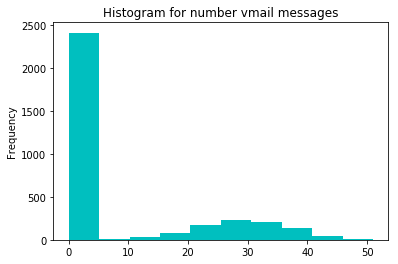

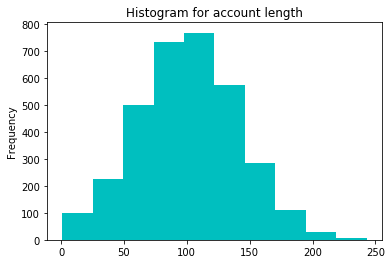

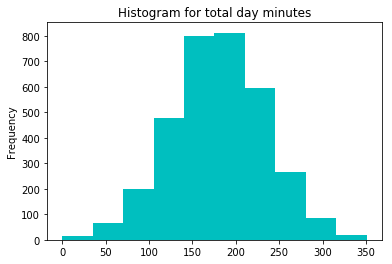

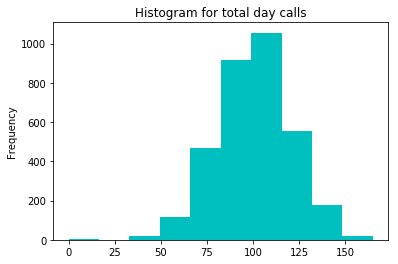

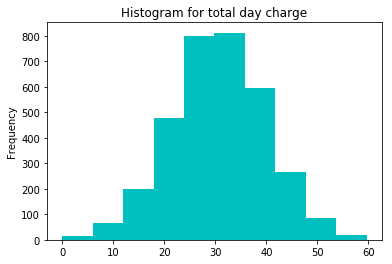

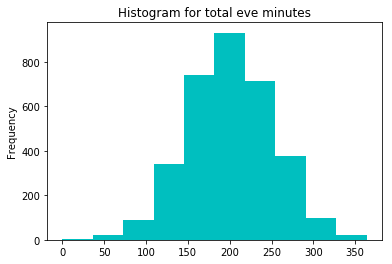

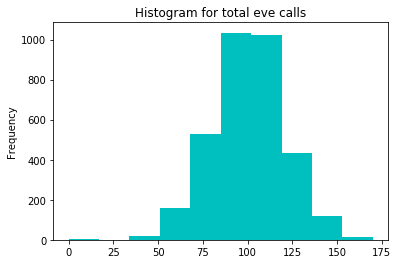

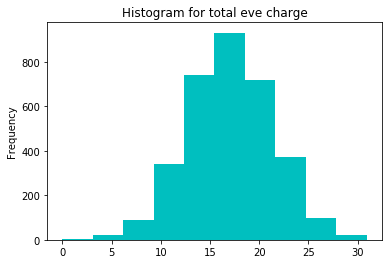

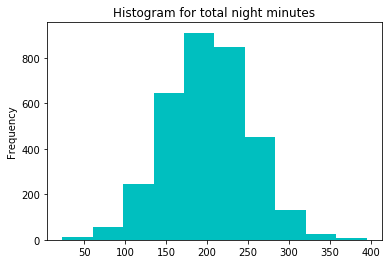

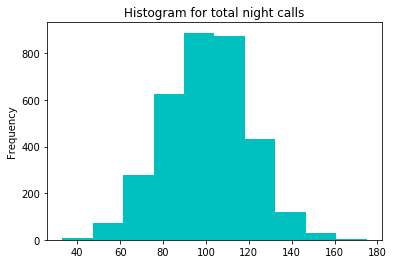

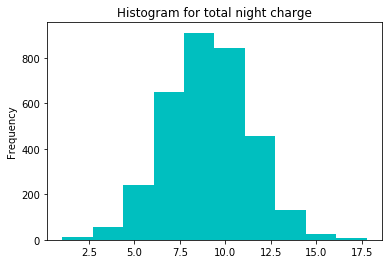

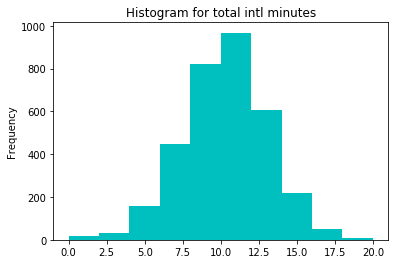

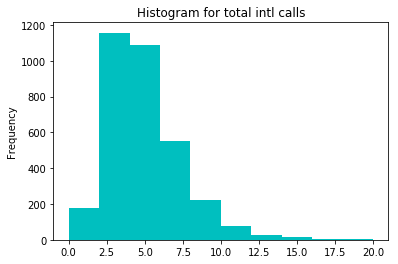

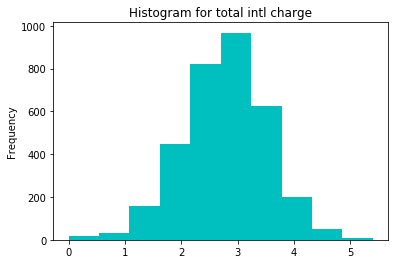

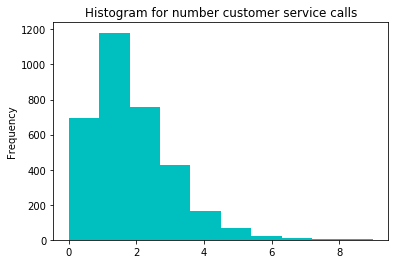

In [14]:
for i in num_cols:
    df[i].plot(kind='hist',color='c')
    plt.title('Histogram for '+i)
    plt.show()

Most the distributions are normal except total international calls, and customer service calls. This is because both histograms 
of these respective variables are right skewed. This skewness can be a result of the presence of outliers. Lets construct box plots to check for outliers in the variables.


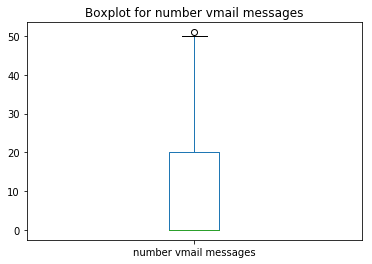

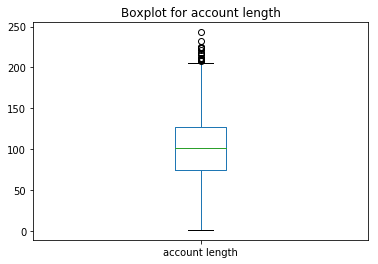

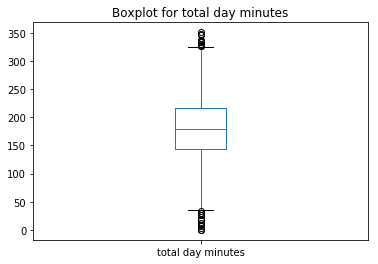

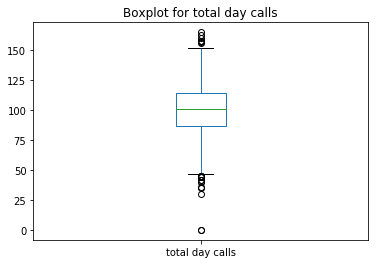

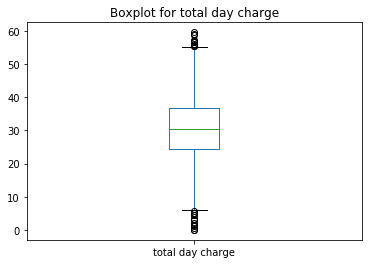

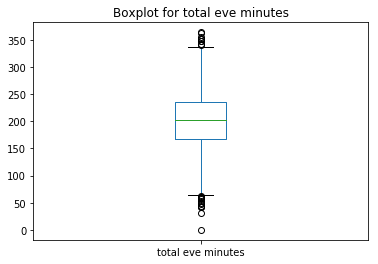

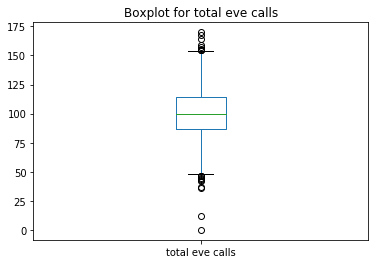

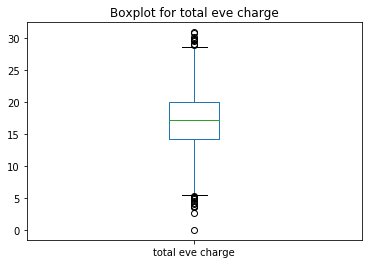

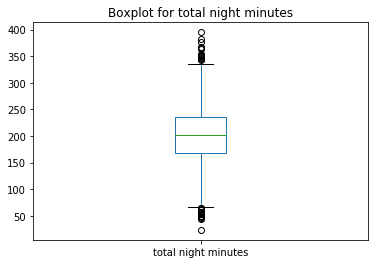

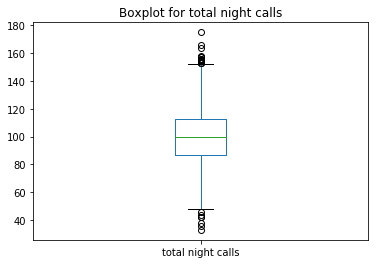

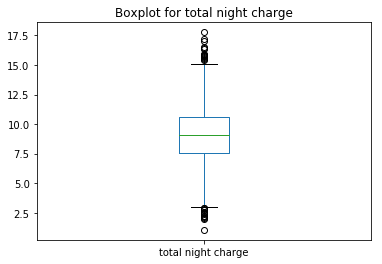

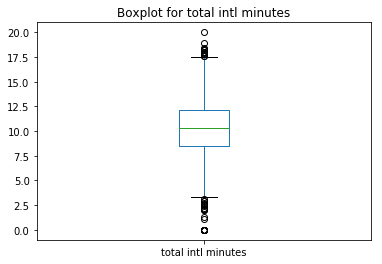

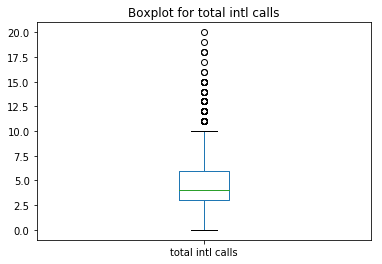

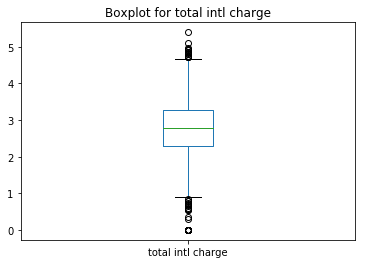

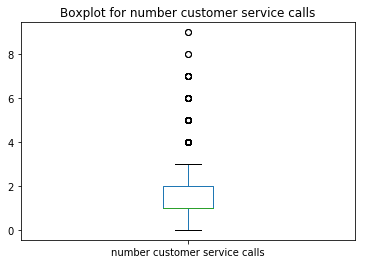

In [15]:
for i in num_cols:
    df[i].plot(kind='box')
    plt.title('Boxplot for '+i)
    plt.show()

Boxplots revealed the outliers more clearly. So we'll fix these outliers in the Outlier Treatment Section.
### Categorical Variables
Let's construct bar plots to see the frequencies of each class of categorical variables

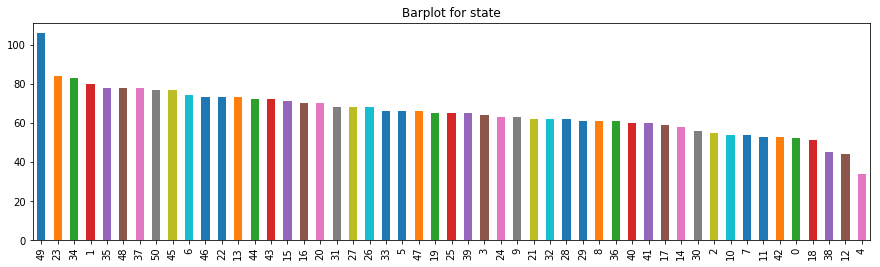

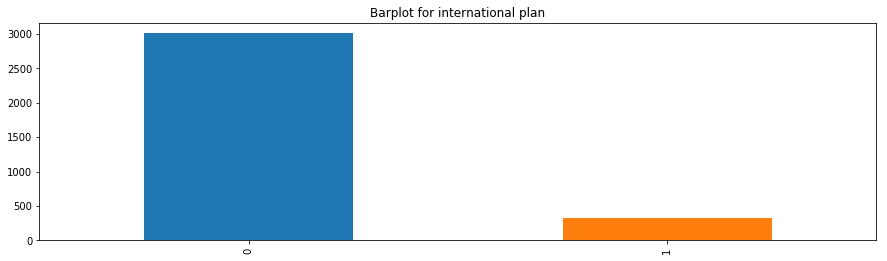

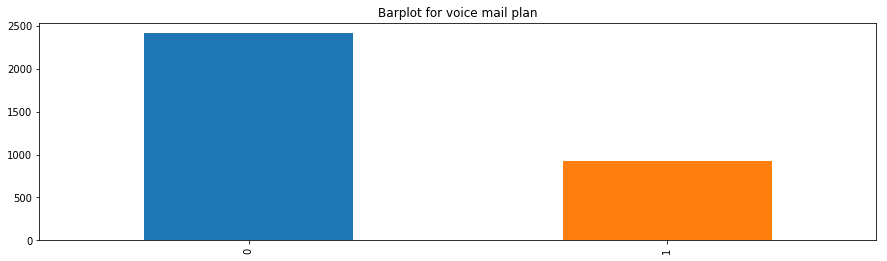

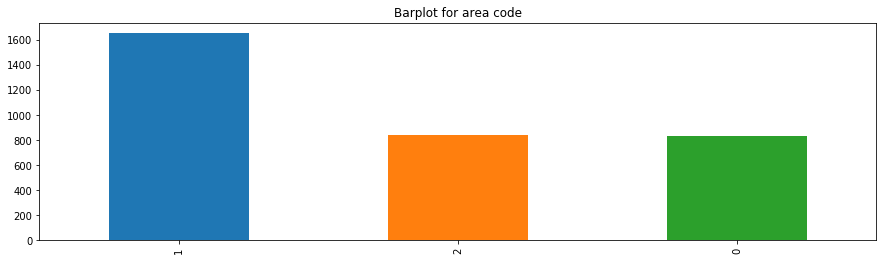

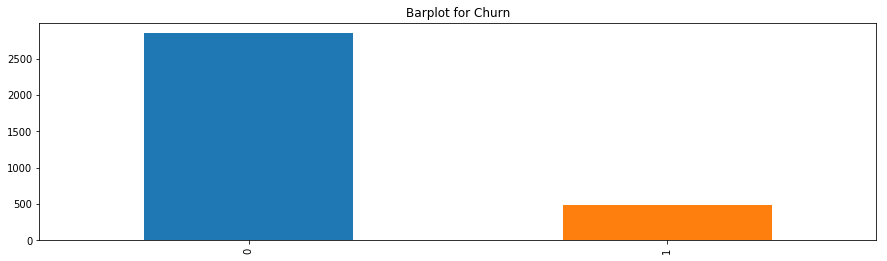

In [16]:
for i in cat_cols:
    df[i].value_counts().plot(kind='bar',figsize=(15,4))
    plt.title('Barplot for '+i)
    plt.show()

### Oulier Treatment
Lets treat the outliers found in the numerical variables. We'll be using the mean imputation method for outlier treatment.

In [17]:
def outlier_imputer(df_o,num_cols):
    # Outlier Analysis
    while True:
        for i in num_cols:
            min=(df_o[i].quantile(0.25)-1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))    
            max=(df_o[i].quantile(0.75)+1.5*(df_o[i].quantile(0.75)-df_o[i].quantile(0.25)))
            df_o.loc[df_o[i]<min,i] = np.nan
            df_o.loc[df_o[i]>max,i] = np.nan
        missing_val = df_o.isnull().sum()
        print(missing_val)
        if(missing_val.sum()>0):
            for i in num_cols:
                if len(df_o[df_o[i].isnull()])>0:
                    df_o.loc[df_o[i].isnull(),i]=np.mean(df_o[i])
        else:
            break
    return df_o
df=outlier_imputer(df,num_cols)

state                              0
account length                    18
area code                          0
international plan                 0
voice mail plan                    0
number vmail messages              1
total day minutes                 25
total day calls                   23
total day charge                  25
total eve minutes                 24
total eve calls                   20
total eve charge                  24
total night minutes               30
total night calls                 22
total night charge                30
total intl minutes                46
total intl calls                  78
total intl charge                 49
number customer service calls    267
Churn                              0
dtype: int64
state                              0
account length                     0
area code                          0
international plan                 0
voice mail plan                    0
number vmail messages              0
total day minutes        

The outliers were treated with the custom function which finds and treats outliers till there are no outliers left. The mean imputation technique took 3 iterations to completely remove the outliers from the data. Let's look at the distributions now.

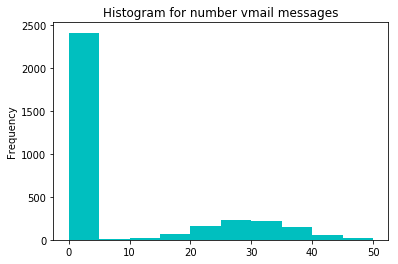

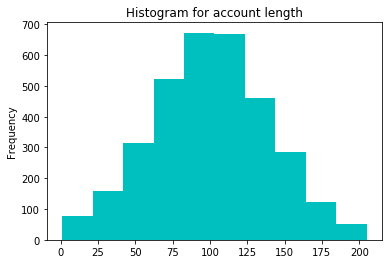

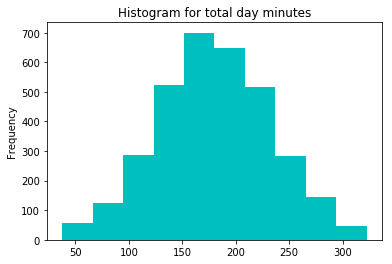

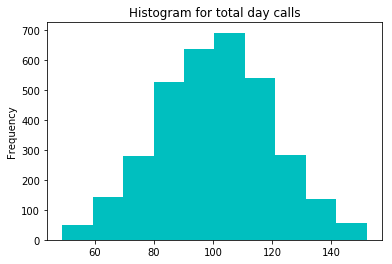

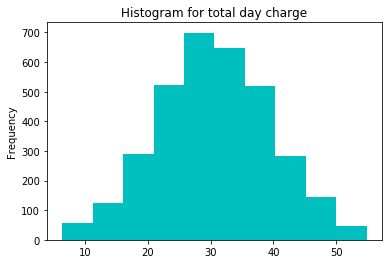

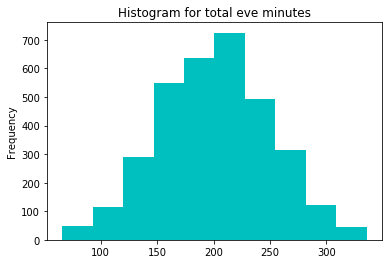

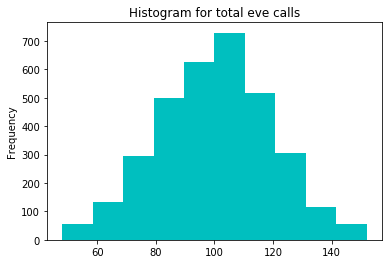

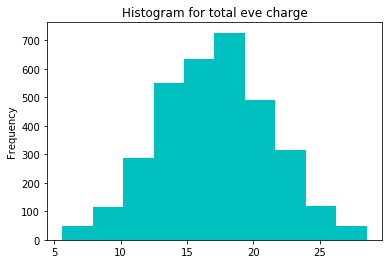

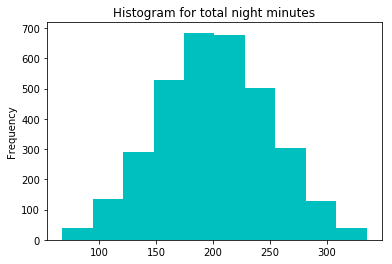

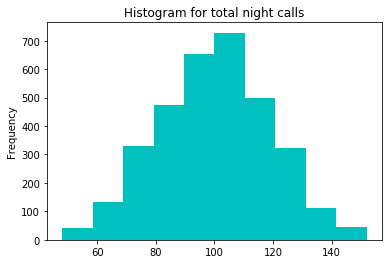

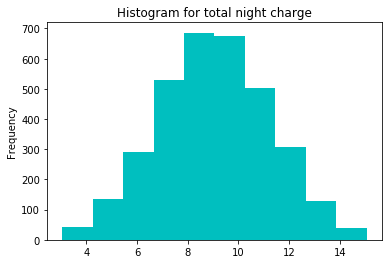

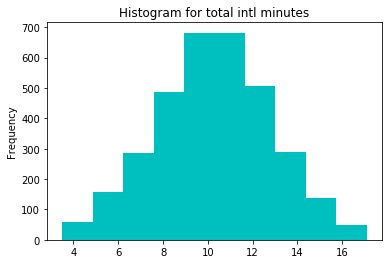

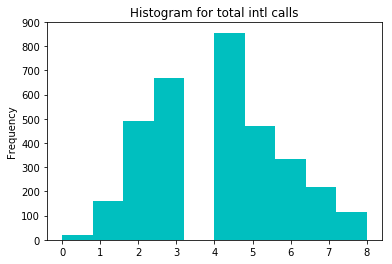

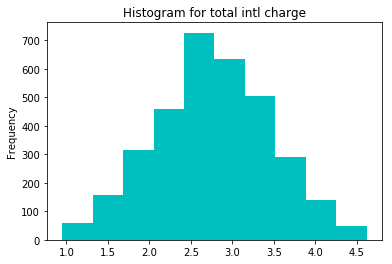

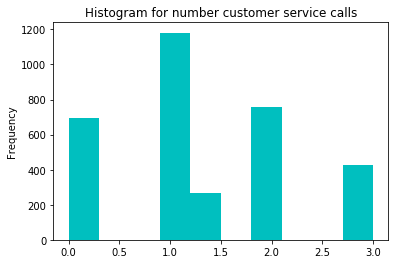

In [18]:
for i in num_cols:
    df[i].plot(kind='hist',color='c')
    plt.title('Histogram for '+i)
    plt.show()

Now the variable distributions are much more normal. Lets look the realtionship between the independent variables and dependent variable to understand each predictors effect on target.

##### Let's use boxplot to see the effect of numerical predictors on the target.

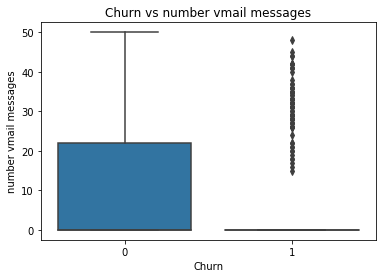

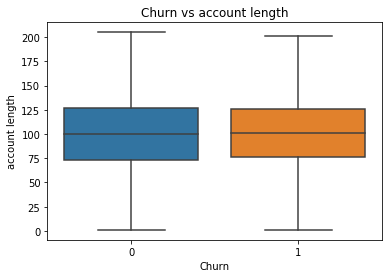

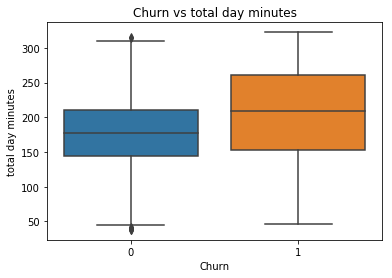

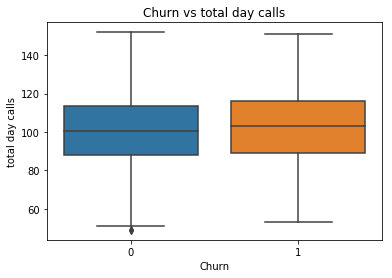

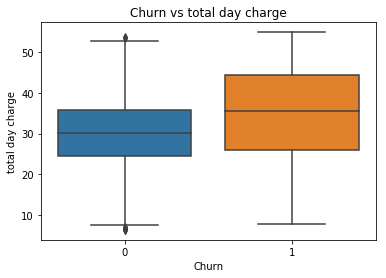

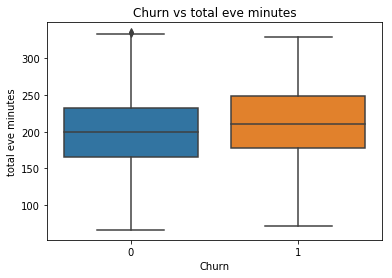

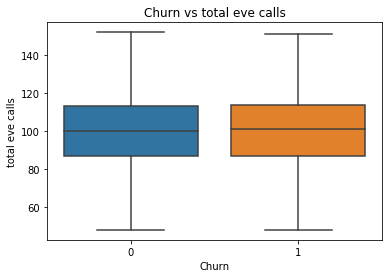

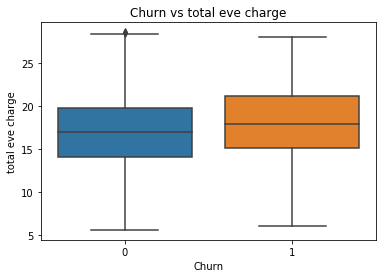

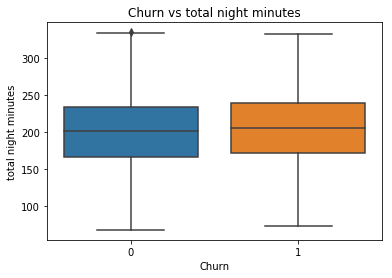

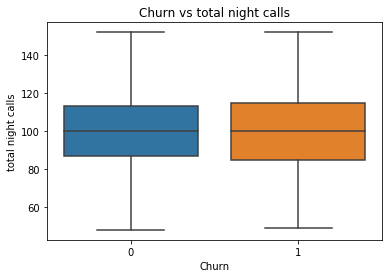

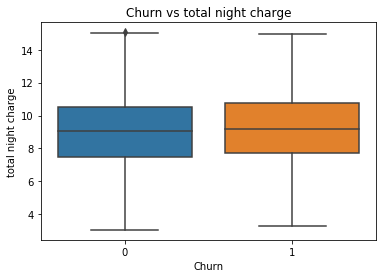

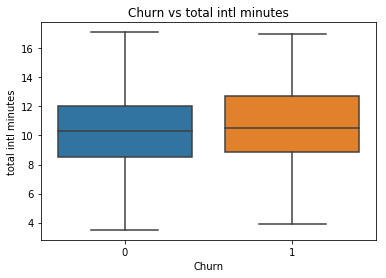

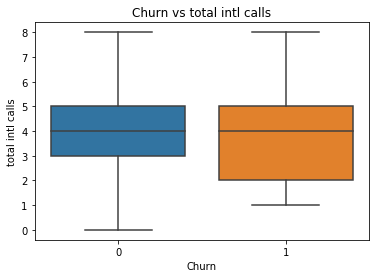

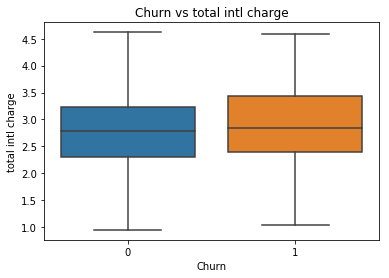

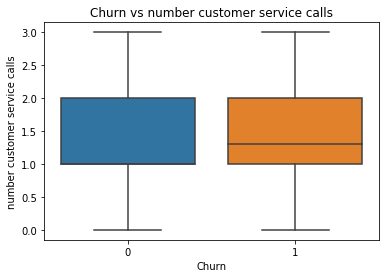

In [19]:
for i in num_cols:
    sns.boxplot(x=df['Churn'],y=df[i]).set_title('Churn vs '+i)
    plt.show()

##### Lets use multibar plot to see relationship between categorical preictors and target

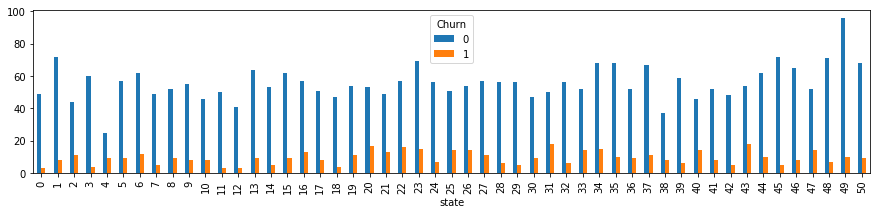

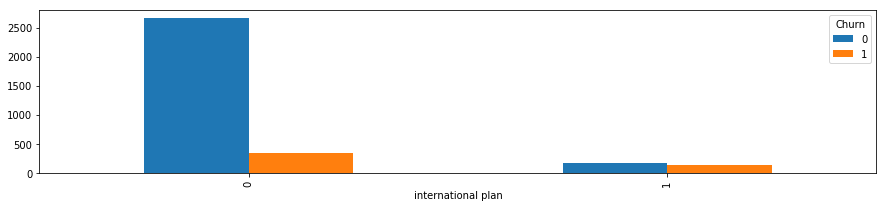

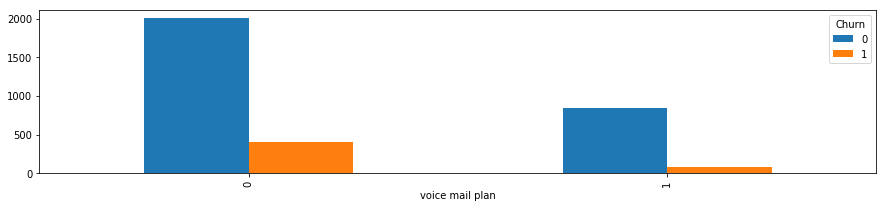

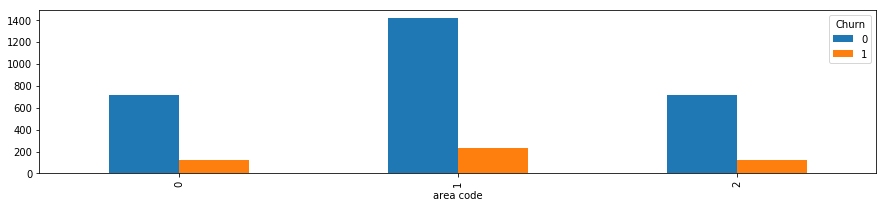

In [20]:
for i in cat_cols[:-1]:
    pd.crosstab(df[i],df.Churn).plot(kind='bar',figsize=(15,3))
    plt.show()

We see that most numerical predictors have similar median value for churning and categorical predictors do have some effect on the target. Let's select important features from the data.
### Feature Selection
##### We'll use correlation to find correlated numerical variables and remove one of them. 
##### For Categorical variables we'll use chi-square test to find association between categorical predictors and target.

Fischer scores: 
 state                   1.701057
international plan    203.244178
voice mail plan        25.156959
area code               0.017774
dtype: float64
P-values: 
 state                 1.921498e-01
international plan    4.091735e-46
voice mail plan       5.284860e-07
area code             8.939421e-01
dtype: float64
Removed the following columns due to correlation/association: total day minutes, total eve minutes, total night minutes, total intl minutes, state, area code


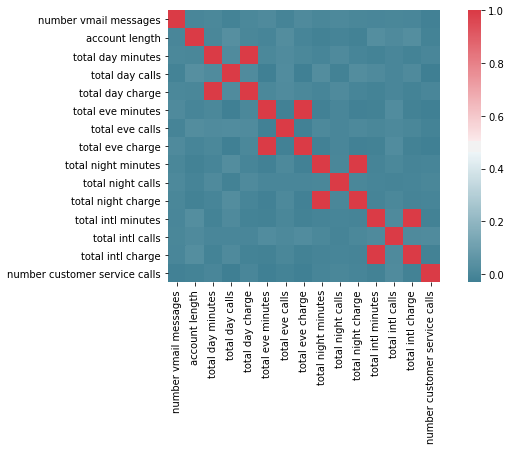

In [21]:
def feature_selection(df,num_cols,cat_cols):
    #Set the width and hieght of the plot
    f, ax = plt.subplots(figsize=(10, 5))
    #Generate correlation matrix
    corr = df[num_cols].corr()
    #Plot using seaborn library
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    #List of columns with high correlation
    rm_cols=[]
    #This loop finds and adds one of the correlated columns to the rm_cols list.
    for i in corr.columns:
        for j in corr.columns:
            if i!=j and corr.loc[i,j]>0.7:
                if not (i in rm_cols or j in rm_cols):
                    rm_cols.append(i)
    #Editing the num_cols and removing the correlated cols
    for i in rm_cols:
        num_cols.remove(i)
    #For categorical Variables, we use chi2 to find important variables.
    df[cat_cols] = df[cat_cols].astype(np.float64)
    f_score=chi2(df[cat_cols[:-1]],df.iloc[:,-1])
    f_vals=pd.Series(f_score[0])
    f_vals.index=cat_cols[:-1]
    p_vals=pd.Series(f_score[1])
    p_vals.index=cat_cols[:-1]
    print("Fischer scores: \n",f_vals)
    print("P-values: \n",p_vals)
    #all cols with p-value > 0.05 removed as they are less important
    for i in p_vals[p_vals>0.05].index:
        rm_cols.append(i)
        cat_cols.remove(i)
    #Removing correlated cols from df
    df.drop(columns=rm_cols,axis=1,inplace=True)
    print('Removed the following columns due to correlation/association: '+', '.join(rm_cols))
    return df,num_cols,cat_cols
df,num_cols,cat_cols=feature_selection(df,num_cols,cat_cols)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
account length                   3333 non-null float64
international plan               3333 non-null float64
voice mail plan                  3333 non-null float64
number vmail messages            3333 non-null float64
total day calls                  3333 non-null float64
total day charge                 3333 non-null float64
total eve calls                  3333 non-null float64
total eve charge                 3333 non-null float64
total night calls                3333 non-null float64
total night charge               3333 non-null float64
total intl calls                 3333 non-null float64
total intl charge                3333 non-null float64
number customer service calls    3333 non-null float64
Churn                            3333 non-null float64
dtypes: float64(14)
memory usage: 364.6 KB


### Modelling the data
Lets start building a model for the data. So first lets split the data into train and test.

In [23]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


### Lets use Logistic Regression for classification

In [24]:
lg_model=LogisticRegression(random_state=123)
lg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
accuracy_score(y_test,lg_model.predict(X_test))

0.873

In [26]:
confusion_matrix(y_test,lg_model.predict(X_test))

array([[853,  13],
       [114,  20]], dtype=int64)

### Lets load the actual test data

In [27]:
df_test=pd.read_csv('Test_data.csv')

In [28]:
df_test=df_test[df.columns]

In [29]:
df_test.shape

(1667, 14)

In [30]:
df.shape

(3333, 14)

In [31]:
df_test['Churn']=labelEnc_churn.transform(df_test['Churn'])
df_test['international plan']=labelEnc_intpl.transform(df_test['international plan'])
df_test['voice mail plan']=labelEnc_vpl.transform(df_test['voice mail plan'])
df_test=df_test.astype(np.float64)

In [32]:
X_test_full=df_test.iloc[:,:-1]
y_test_full=df_test.iloc[:,-1]

In [33]:
accuracy_score(y_test_full,lg_model.predict(X_test_full))

0.874625074985003

In [34]:
confusion_matrix(y_test_full,lg_model.predict(X_test_full))

array([[1431,   12],
       [ 197,   27]], dtype=int64)

In [35]:
tn, fp, fn, tp=confusion_matrix(y_test_full,lg_model.predict(X_test_full)).ravel()

In [36]:
tn

1431

In [37]:
fp

12

In [38]:
fn/(tp+fn)

0.8794642857142857

In [39]:
fn

197

In [40]:
tp

27

As the false negative rate is 88%, which means that the classifier missed 88% of the customers who churned. This is a really bad classifier for the company as it misses 88% of the churning customers. Lets use class weights to reduce the false negative rate.

### New Model with weights balancing the unbalanced target

In [41]:
lg_model_wt=LogisticRegression(random_state=123,class_weight='balanced')
lg_model_wt.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [42]:
accuracy_score(y_test,lg_model_wt.predict(X_test))

0.727

In [43]:
confusion_matrix(y_test,lg_model.predict(X_test))

array([[853,  13],
       [114,  20]], dtype=int64)

In [44]:
accuracy_score(y_test_full,lg_model_wt.predict(X_test_full))

0.7180563887222555

In [45]:
confusion_matrix(y_test_full,lg_model_wt.predict(X_test_full))

array([[1050,  393],
       [  77,  147]], dtype=int64)

In [46]:
tn, fp, fn, tp=confusion_matrix(y_test_full,lg_model_wt.predict(X_test_full)).ravel()

In [47]:
tn

1050

In [48]:
fp

393

In [49]:
# False Negative Rate
fn/(tp+fn)

0.34375

In [51]:
# False Negative Rate
fp/(tn+fp)

0.27234927234927236